In [2]:
# import libraries
# !pip install pandas
import pandas as pd


In [3]:
# read the data from the csv file located inside datasets folder
df = pd.read_csv('datasets/data.csv', encoding = "ISO-8859-1", low_memory=False)

In [4]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [5]:
# check the shape of the dataframe
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataframe")

There are 435742 rows and 13 columns in the dataframe


In [6]:
# check the basic info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [7]:
# check the type of data for each column
df.dtypes

stn_code                        object
sampling_date                   object
state                           object
location                        object
agency                          object
type                            object
so2                            float64
no2                            float64
rspm                           float64
spm                            float64
location_monitoring_station     object
pm2_5                          float64
date                            object
dtype: object

In [8]:
# check for null values in descending order
df.isnull().sum().sort_values(ascending=False)

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
sampling_date                       3
location                            3
state                               0
dtype: int64

In [9]:
# for the float64 columns, fill the null values with the mean of the column
# make a list of the float64 columns
float64_cols = df.select_dtypes(include=['float64']).columns.tolist()
# find the mean and median of each column
mean = df[float64_cols].mean()
#print(mean)
median = df[float64_cols].median()
#print(median)

# fill the null values with the median of the column
df[float64_cols] = df[float64_cols].fillna(median)

# check for null values in descending order
df.isnull().sum().sort_values(ascending=False)

agency                         149481
stn_code                       144077
location_monitoring_station     27491
type                             5393
date                                7
sampling_date                       3
location                            3
state                               0
so2                                 0
no2                                 0
rspm                                0
spm                                 0
pm2_5                               0
dtype: int64

In [10]:
# check for unique values in the dataframe
df.nunique()

stn_code                        745
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

In [11]:
# check for duplicate rows in the dataframe
print(df.duplicated().sum())

# drop the duplicate rows
df.drop_duplicates(inplace=True)

# check rows and columns after dropping the duplicates
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataframe")

# are the unique values in the datraframe got affected?
df.nunique()

# they are same as before, so we can proceed

674
There are 435068 rows and 13 columns in the dataframe


stn_code                        745
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

In [12]:
# drop the columns which are not required
# create a list of columns to be dropped
cols_to_drop = ['agency', 'stn_code', 'date', 'sampling_date', 'location_monitoring_station']

# drop the columns
df.drop(columns=cols_to_drop, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 435068 entries, 0 to 435741
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   state     435068 non-null  object 
 1   location  435065 non-null  object 
 2   type      429711 non-null  object 
 3   so2       435068 non-null  float64
 4   no2       435068 non-null  float64
 5   rspm      435068 non-null  float64
 6   spm       435068 non-null  float64
 7   pm2_5     435068 non-null  float64
dtypes: float64(5), object(3)
memory usage: 29.9+ MB


# Exploratory Data Analysis

In [14]:
# Descriptive statistics of the data
# Mean, Median and Standard deviation of the data

# Find mean and median of the float data
# make a list of the float64 columns
float64_cols = df.select_dtypes(include=['float64']).columns.tolist()
# find the mean and median of each column
mean = df[float64_cols].mean()
print(f"The mean of the float64 columns is: \n{mean}\n")
median = df[float64_cols].median()
print(f"The median of the float64 columns is: \n{median}\n")
standard_deviation = df[float64_cols].std()
print(f"The standard deviation of the float64 columns is: \n{standard_deviation}\n")

The mean of the float64 columns is: 
so2       10.605159
no2       25.680740
rspm     107.135135
spm      202.383374
pm2_5     32.188209
dtype: float64

The median of the float64 columns is: 
so2        8.0
no2       22.0
rspm      90.0
spm      187.0
pm2_5     32.0
dtype: float64

The standard deviation of the float64 columns is: 
so2       10.742597
no2       18.164194
rspm      71.577555
spm      103.535794
pm2_5      4.687069
dtype: float64



In [15]:
# data visualization

# pairplot of the data
import seaborn as sns
# sns.pairplot(data=df, hue = 'type')

[]

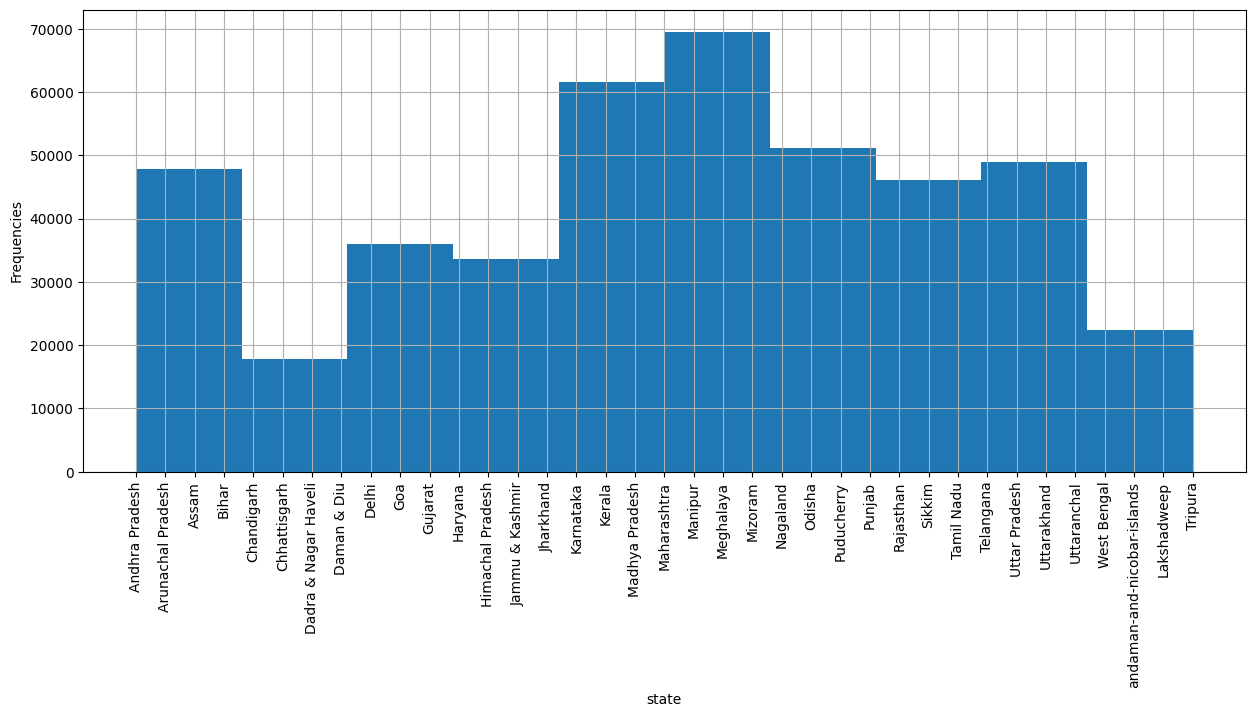

In [16]:
# Check frequency of reading from each state
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel('state')
plt.ylabel('Frequencies')
plt.plot()

[]

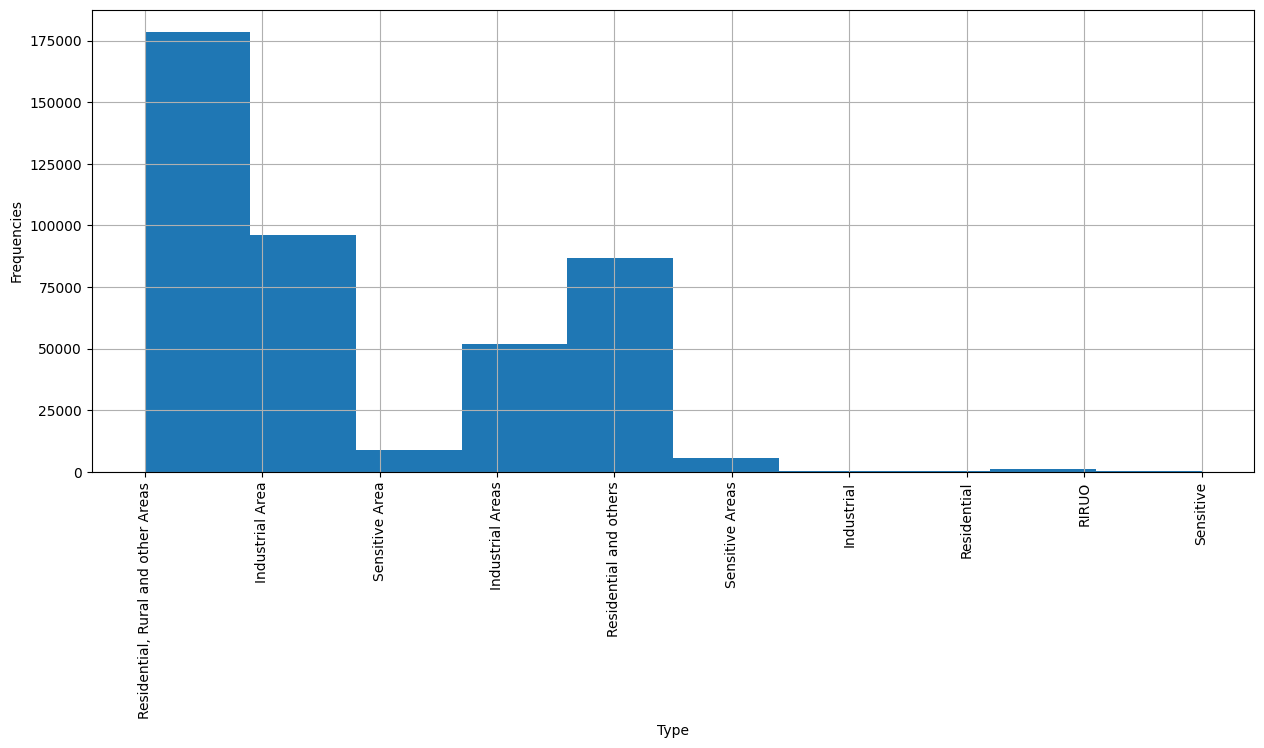

In [17]:
# check the count of types present in the dataset
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()

<Axes: xlabel='state', ylabel='so2'>

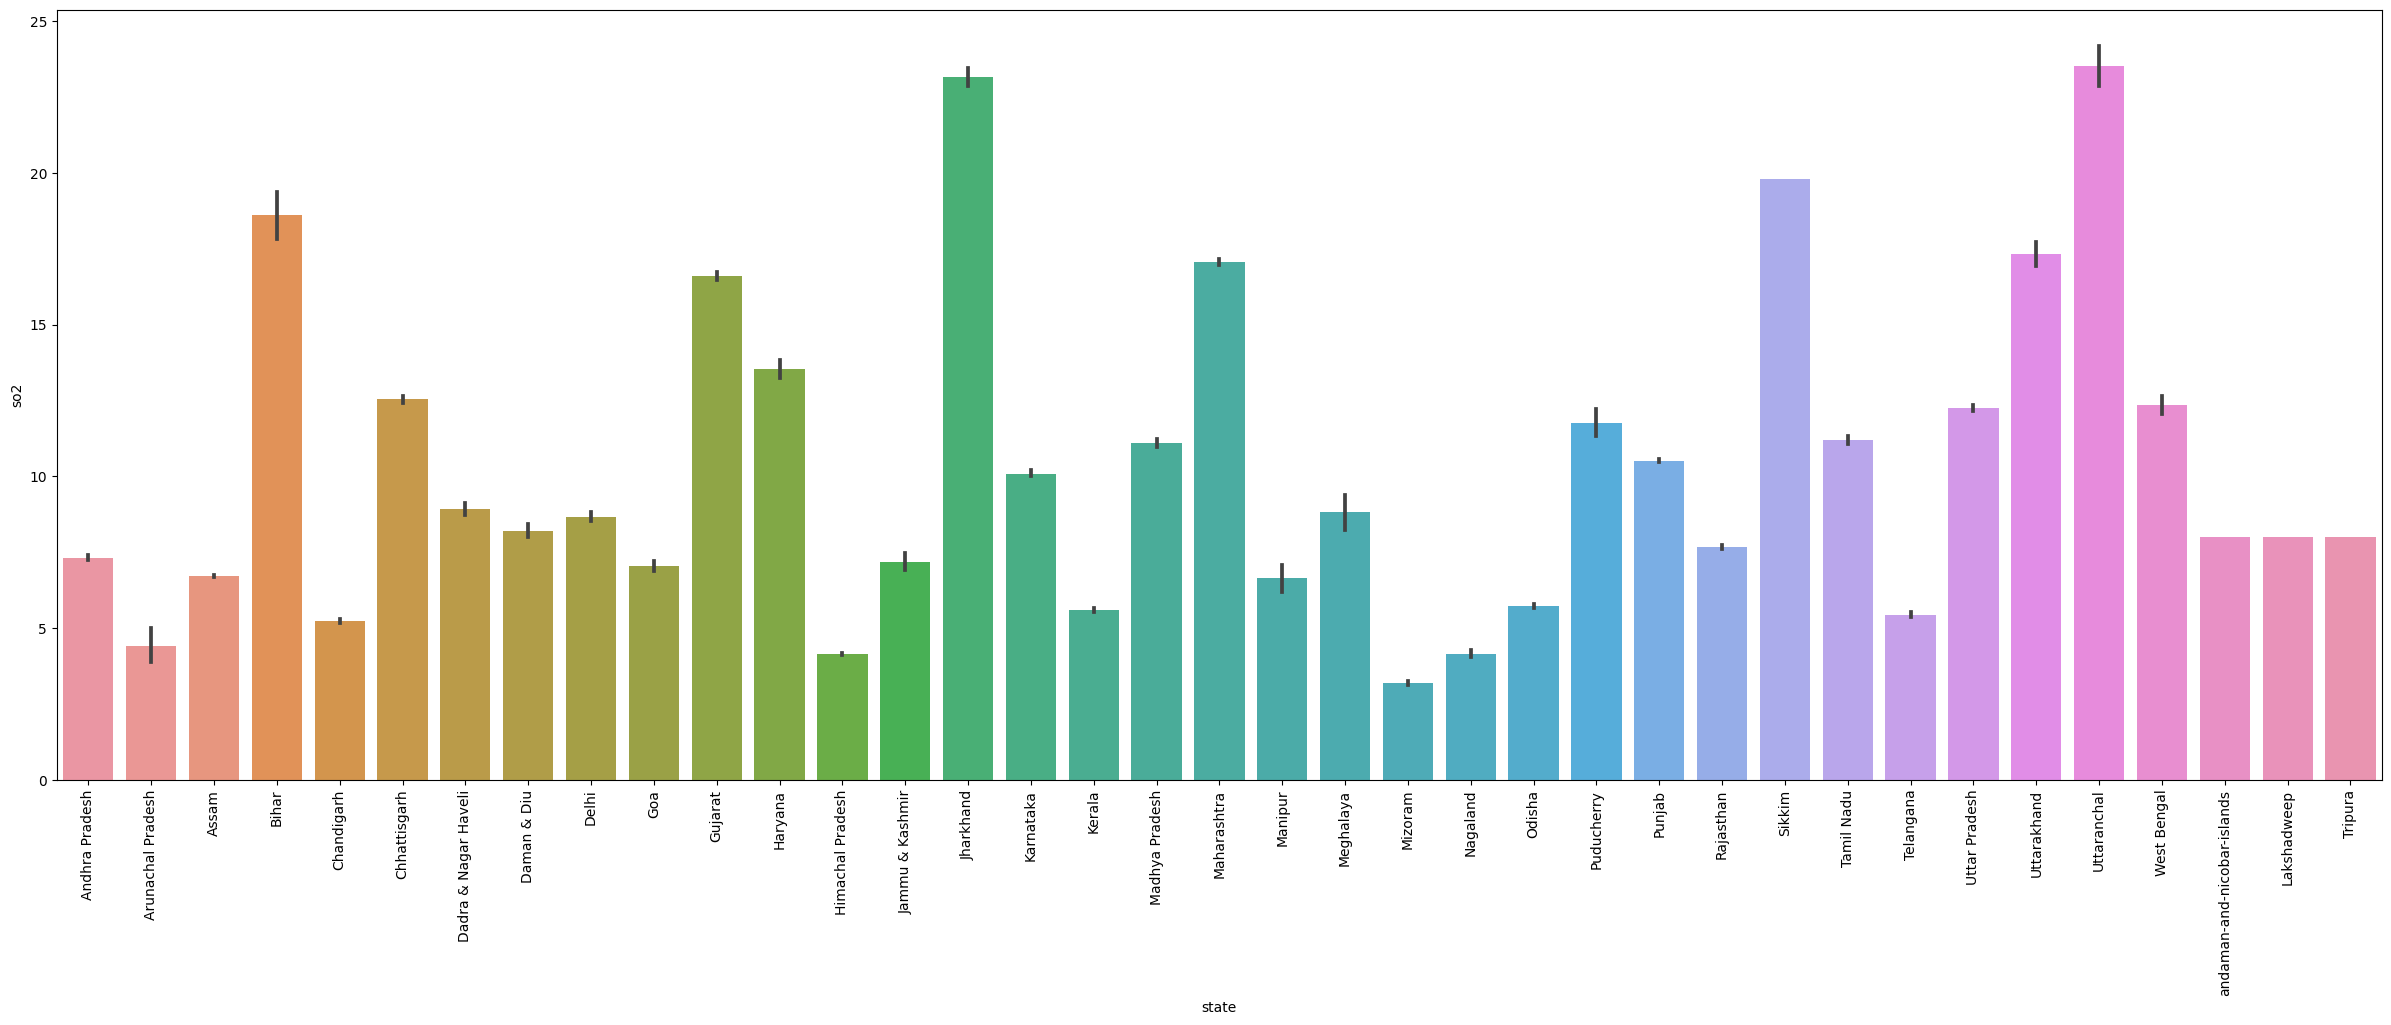

In [18]:
# check the place which has higher SO2 levels in the air
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state', y='so2', data=df)

# uttaranchal has the highest SO2 levels in the air followed by jharkahanad and Sikkim

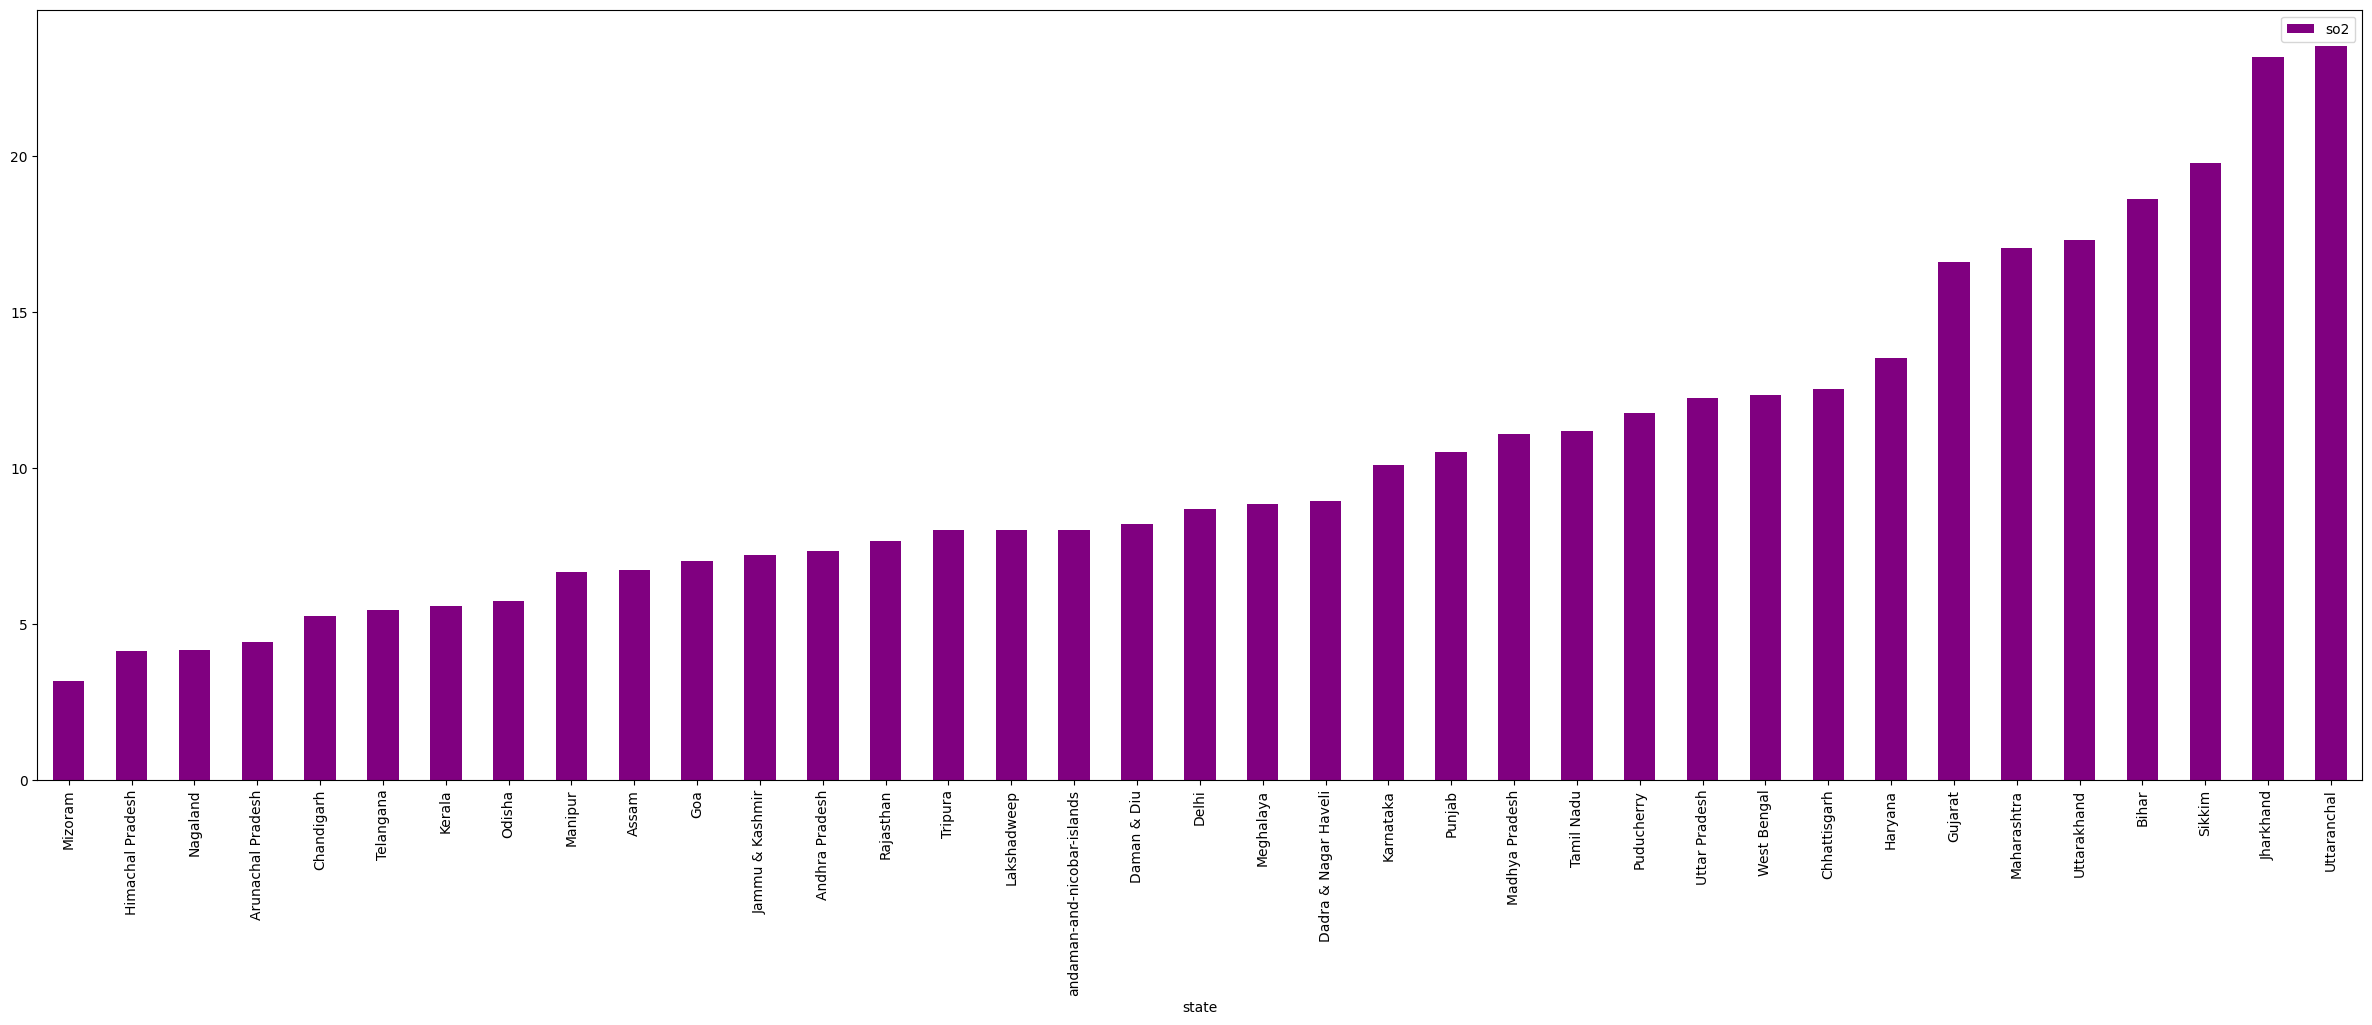

In [19]:
# use groupby to sort it in ascending order
plt.rcParams['figure.figsize']=(30,10)
df[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='purple')
plt.show()

<Axes: xlabel='state', ylabel='no2'>

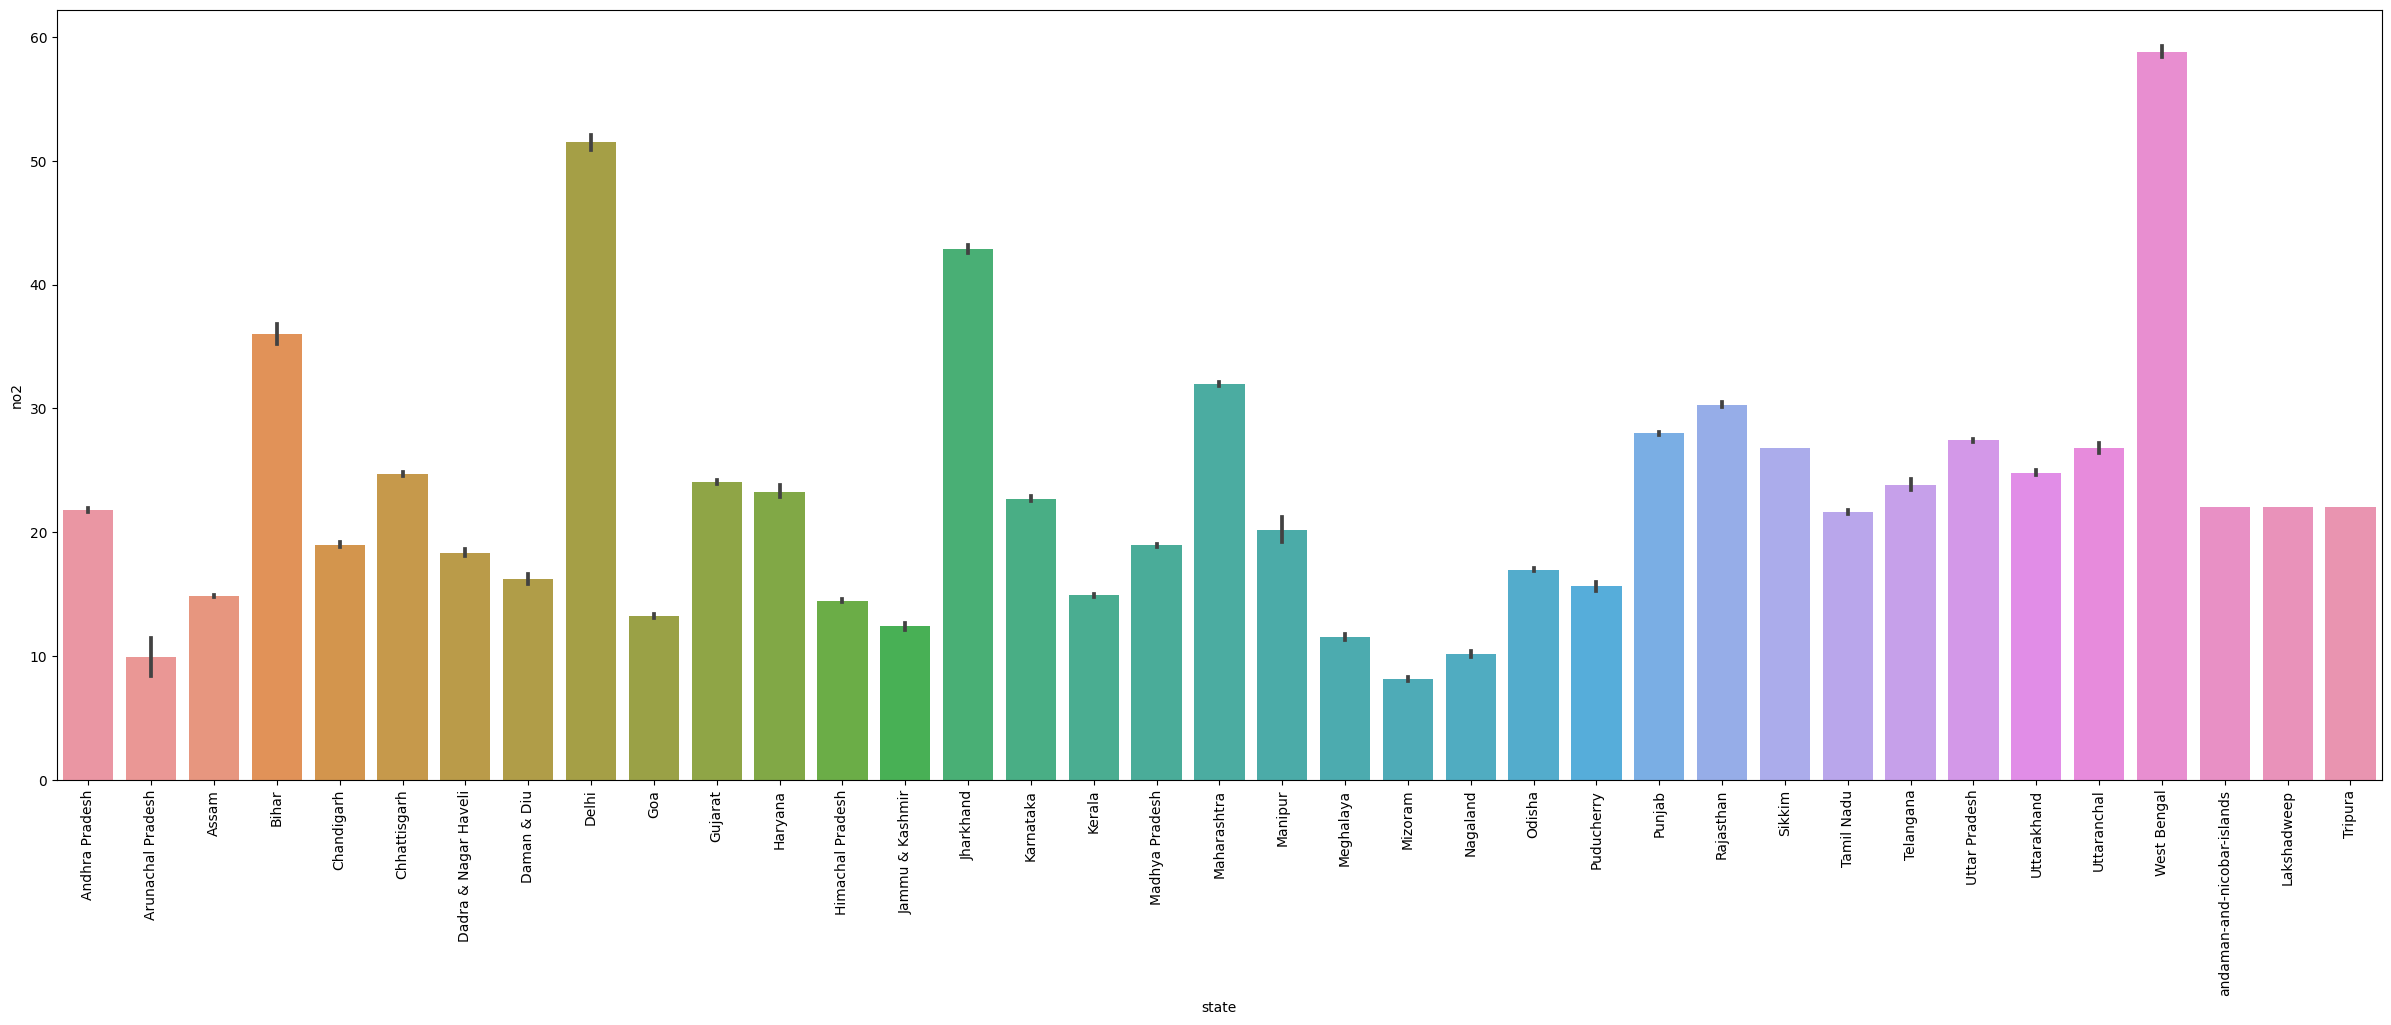

In [20]:
# check the place which has higher SO2 levels in the air
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state', y='no2', data=df)

# West bengal has a higher no2 level compared to other states in India

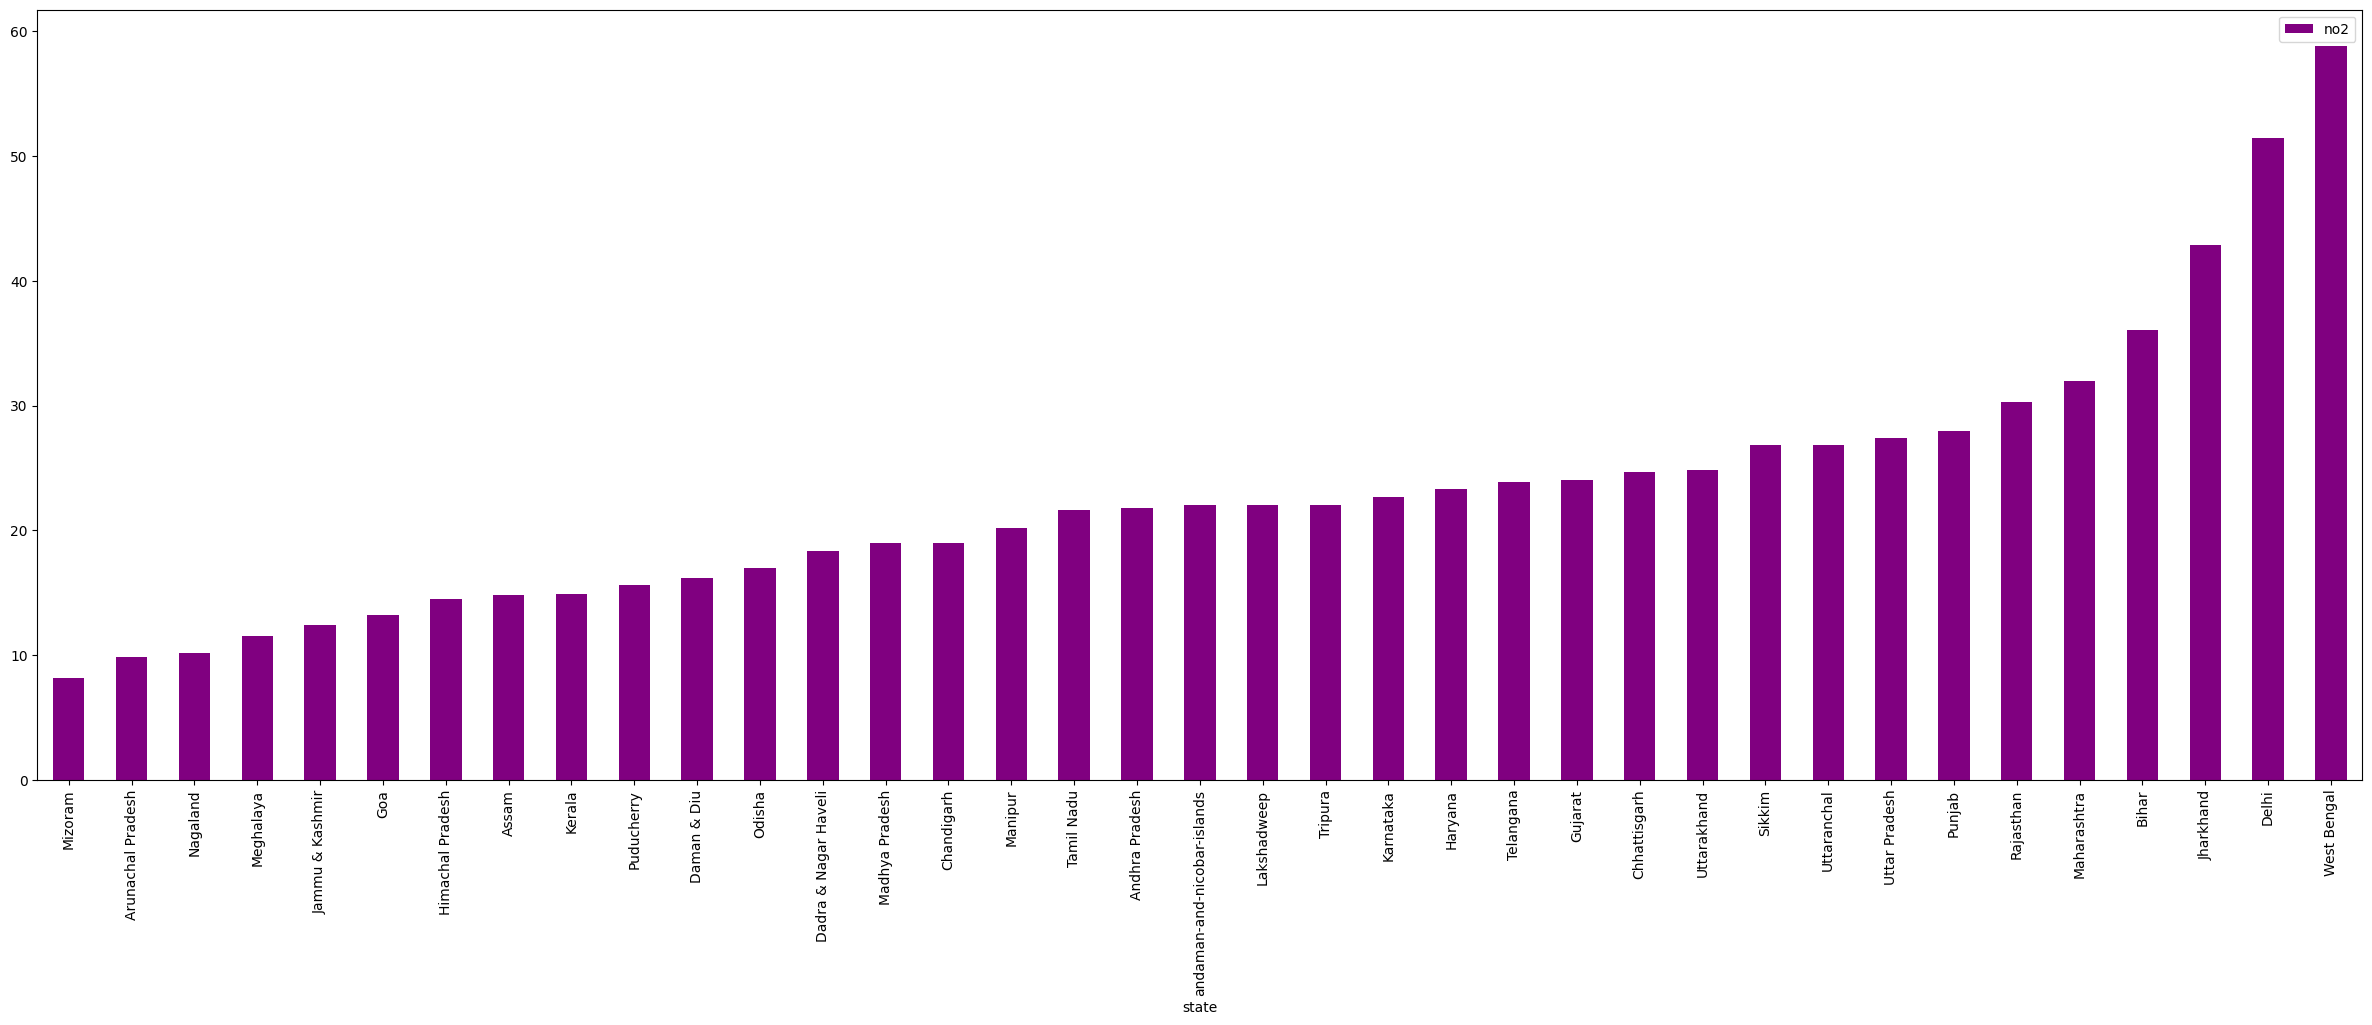

In [21]:
# use groupby to sort it in ascending order
plt.rcParams['figure.figsize']=(30,10)
df[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='purple')
plt.show()

<Axes: xlabel='state', ylabel='rspm'>

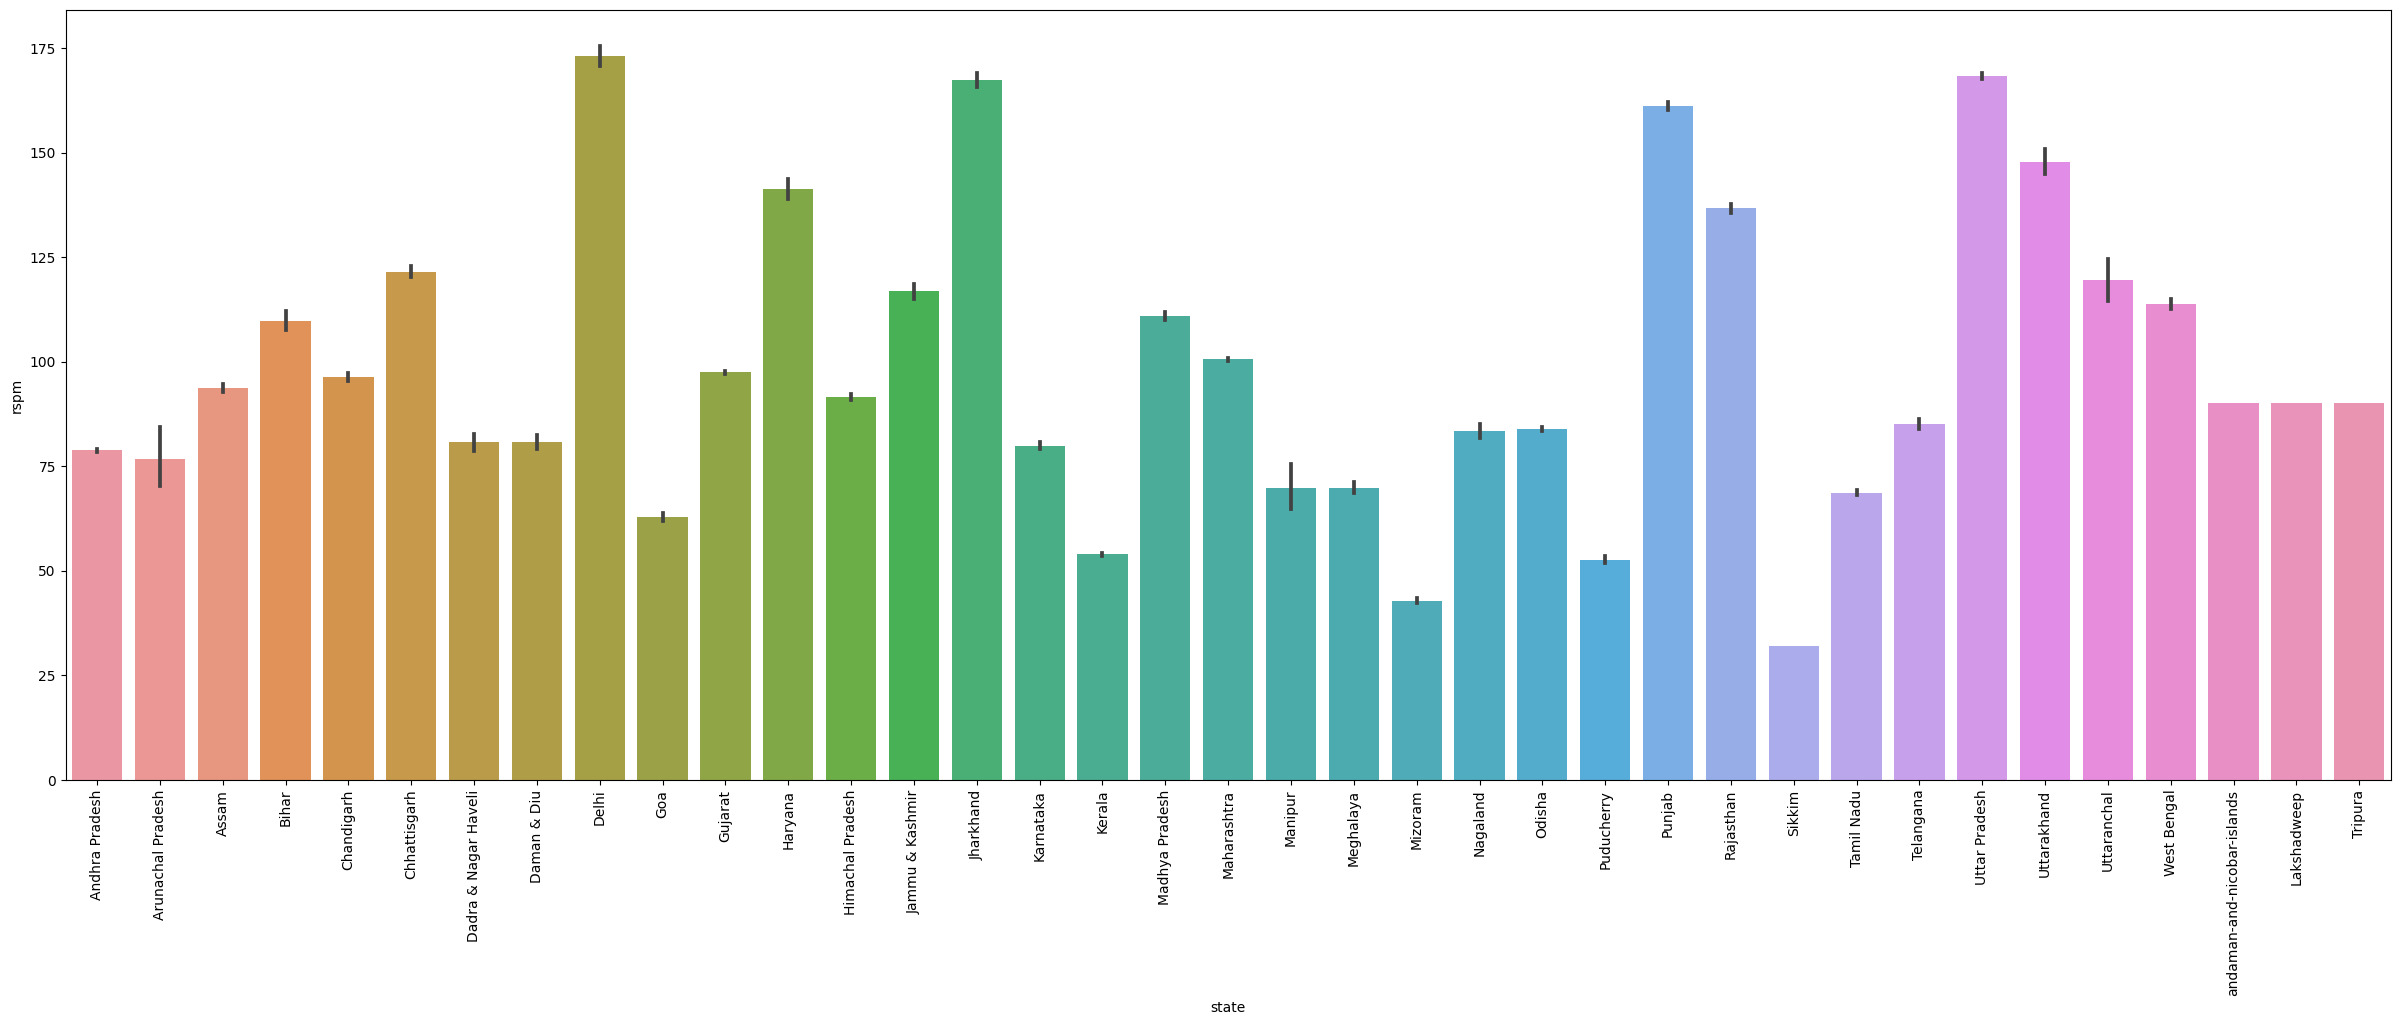

In [22]:
# check the place which has higher rspm levels in the air
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state', y='rspm', data=df)

# Delhi has a higher no2 level compared to other states in India

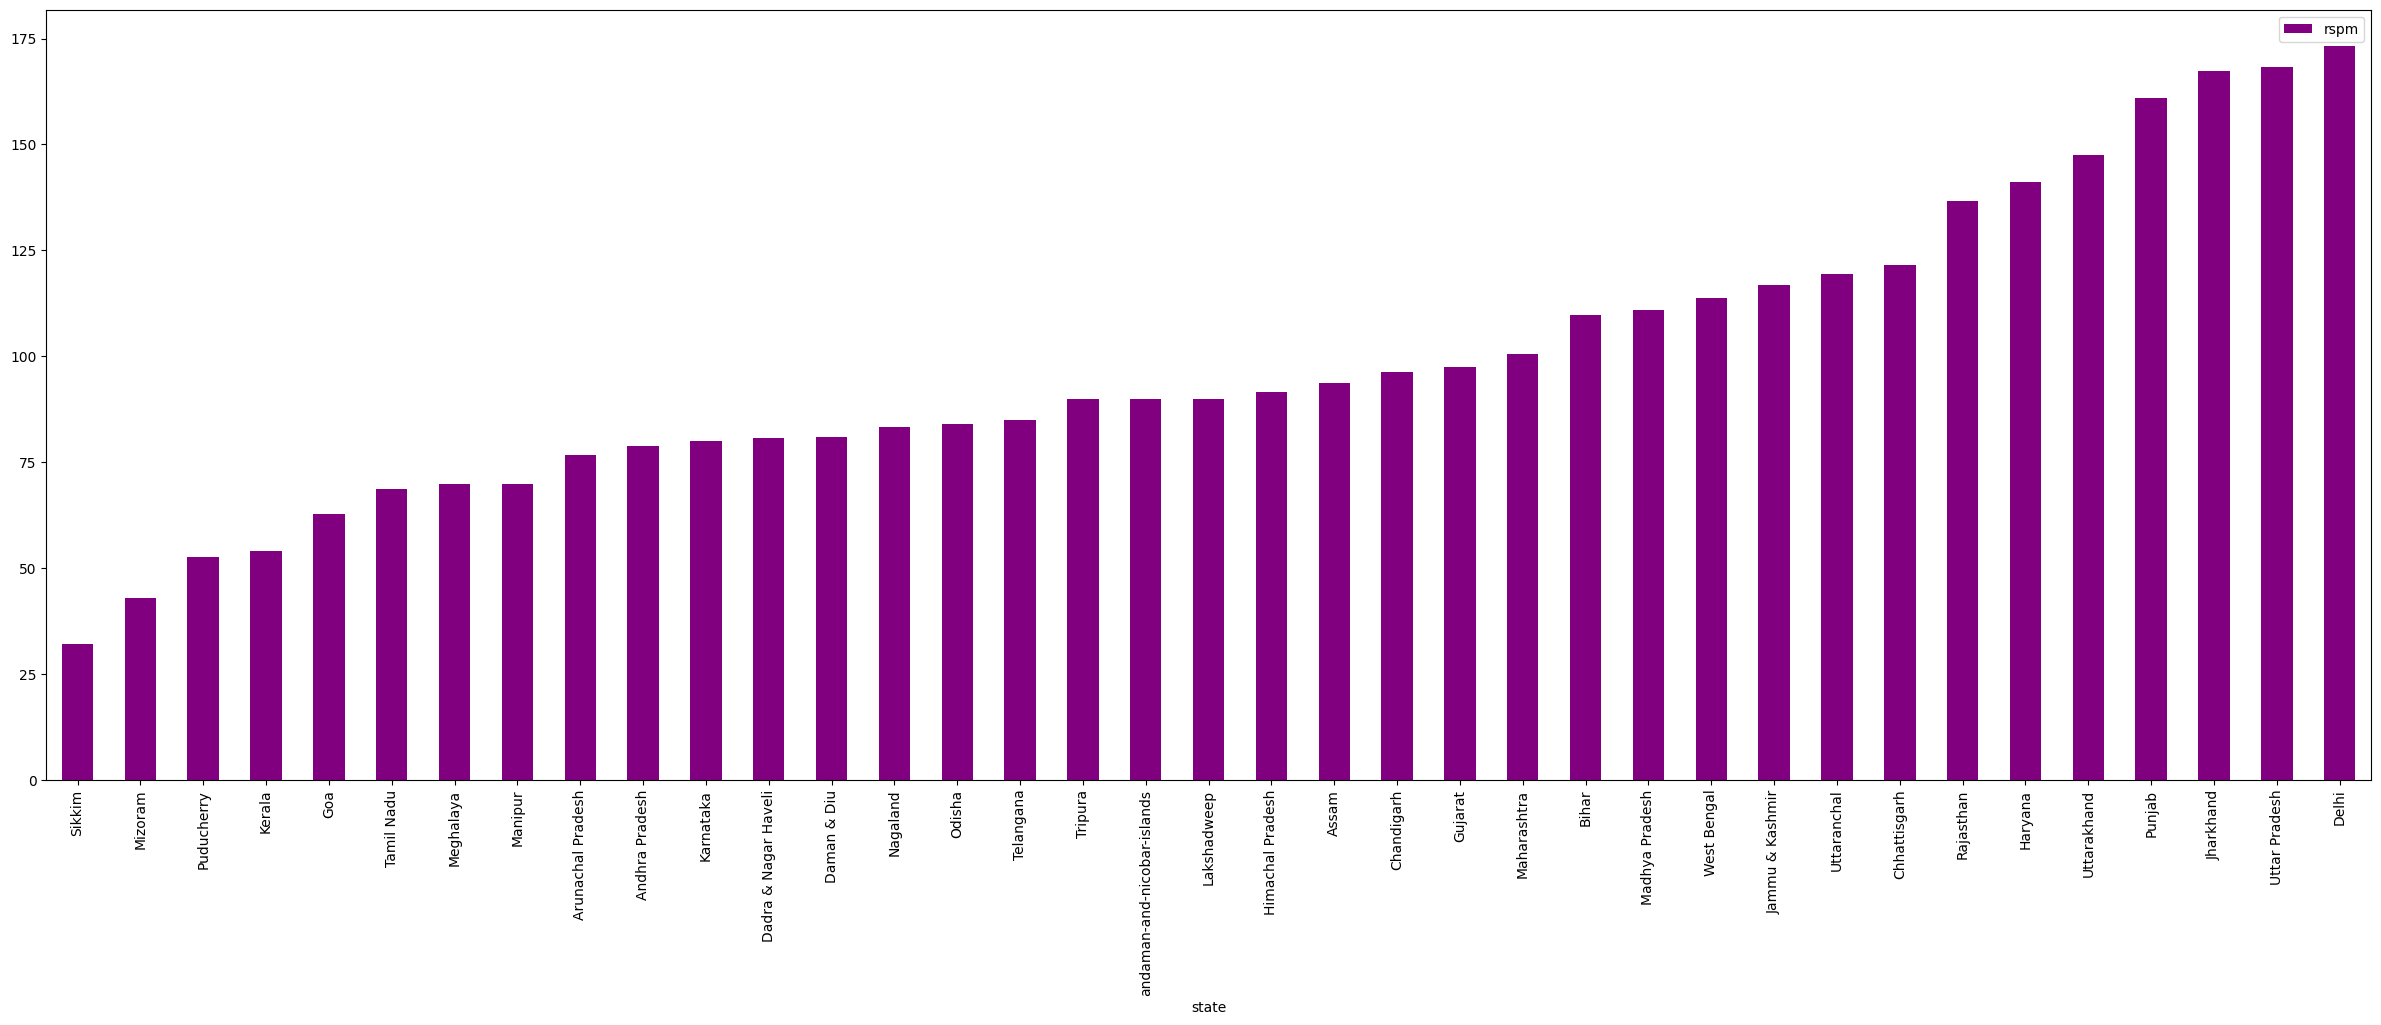

In [40]:
# use groupby to sort it in ascending order
plt.rcParams['figure.figsize']=(30,10)
df[['rspm','state']].groupby(["state"]).mean().sort_values(by='rspm').plot.bar(color='purple')
plt.show()

<Axes: xlabel='state', ylabel='spm'>

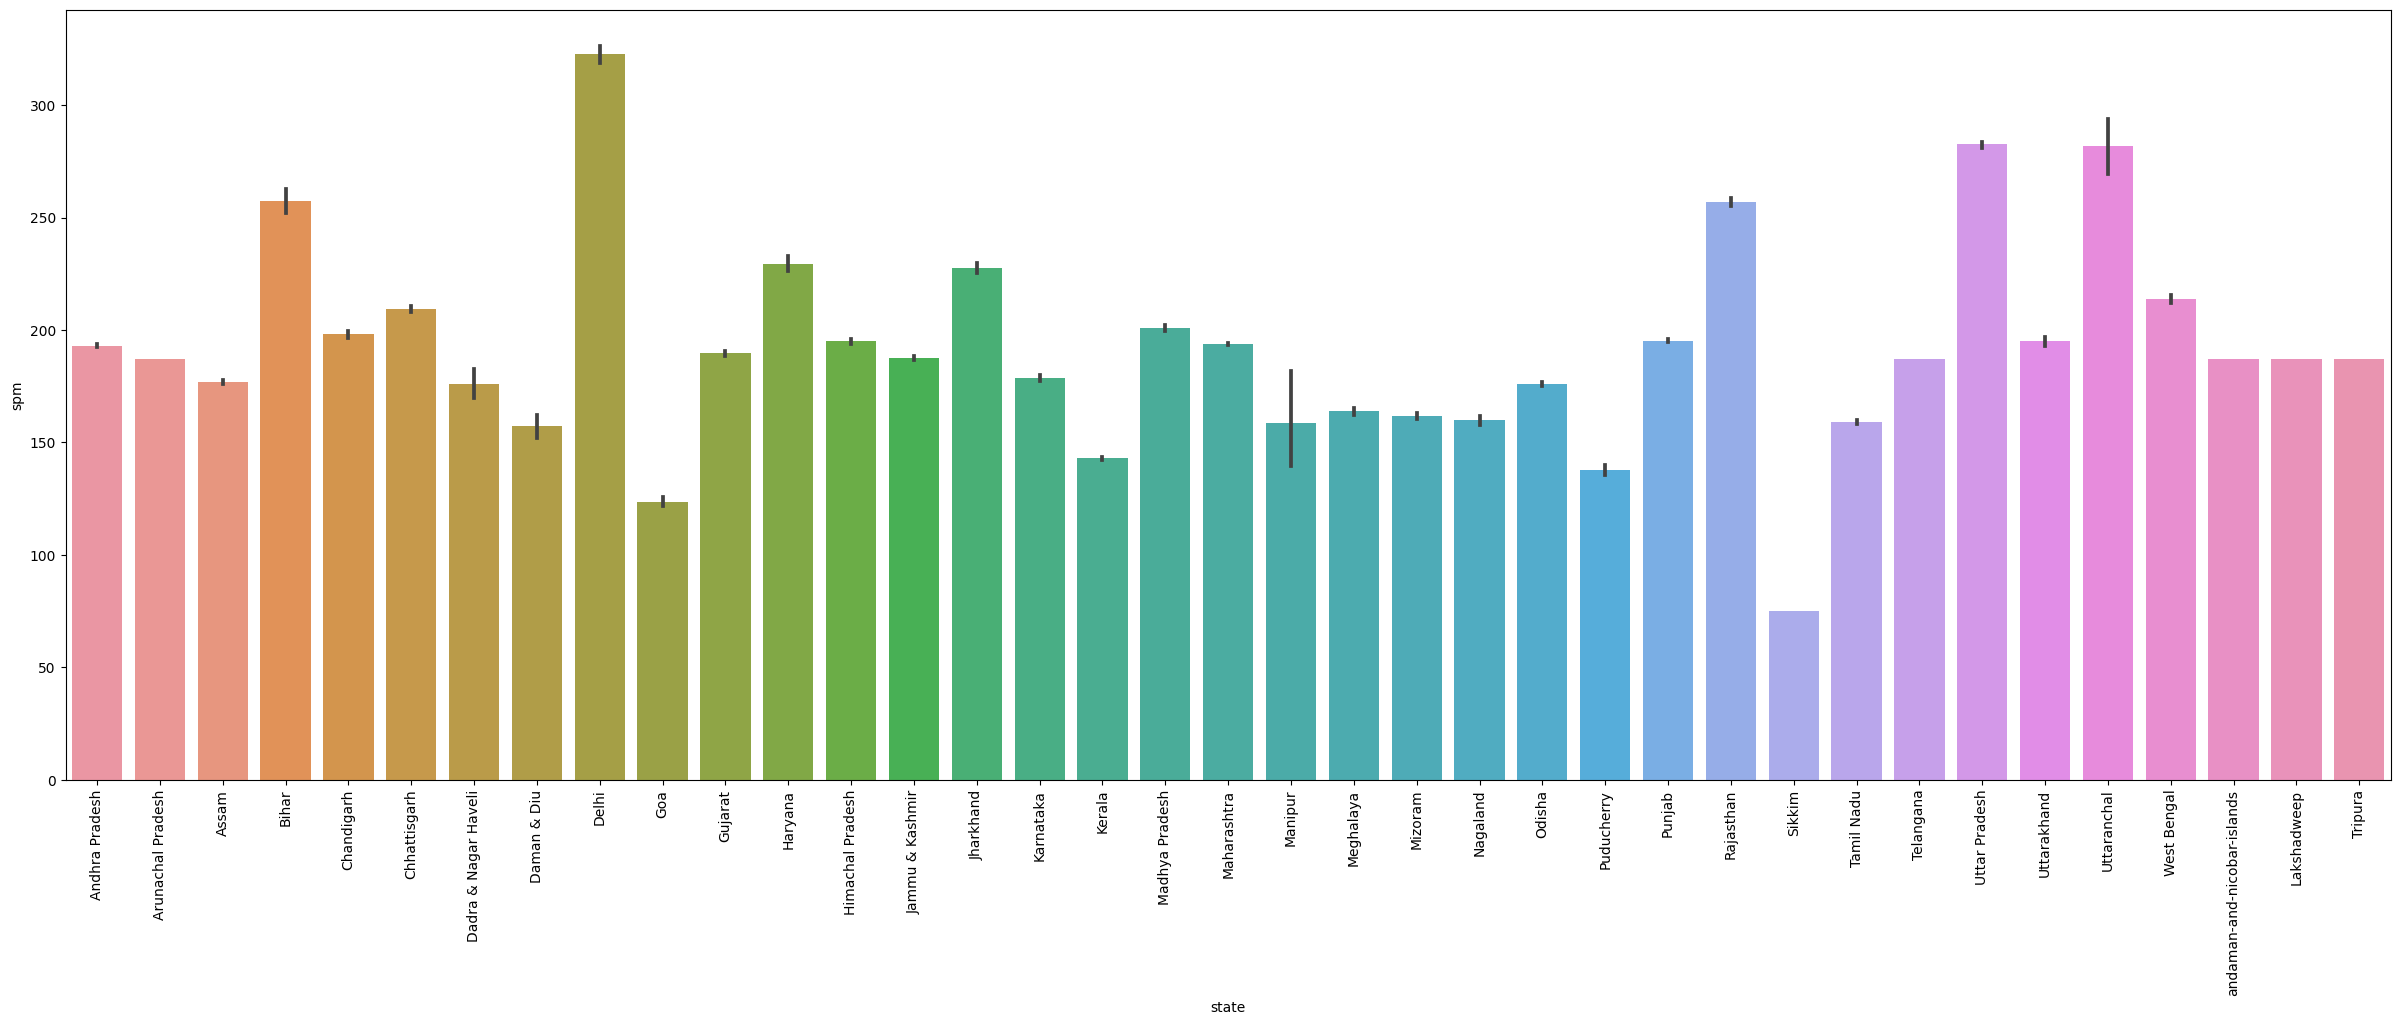

In [24]:
# check the place which has higher spm levels in the air
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state', y='spm', data=df)

# Delhi has a higher no2 level compared to other states in India

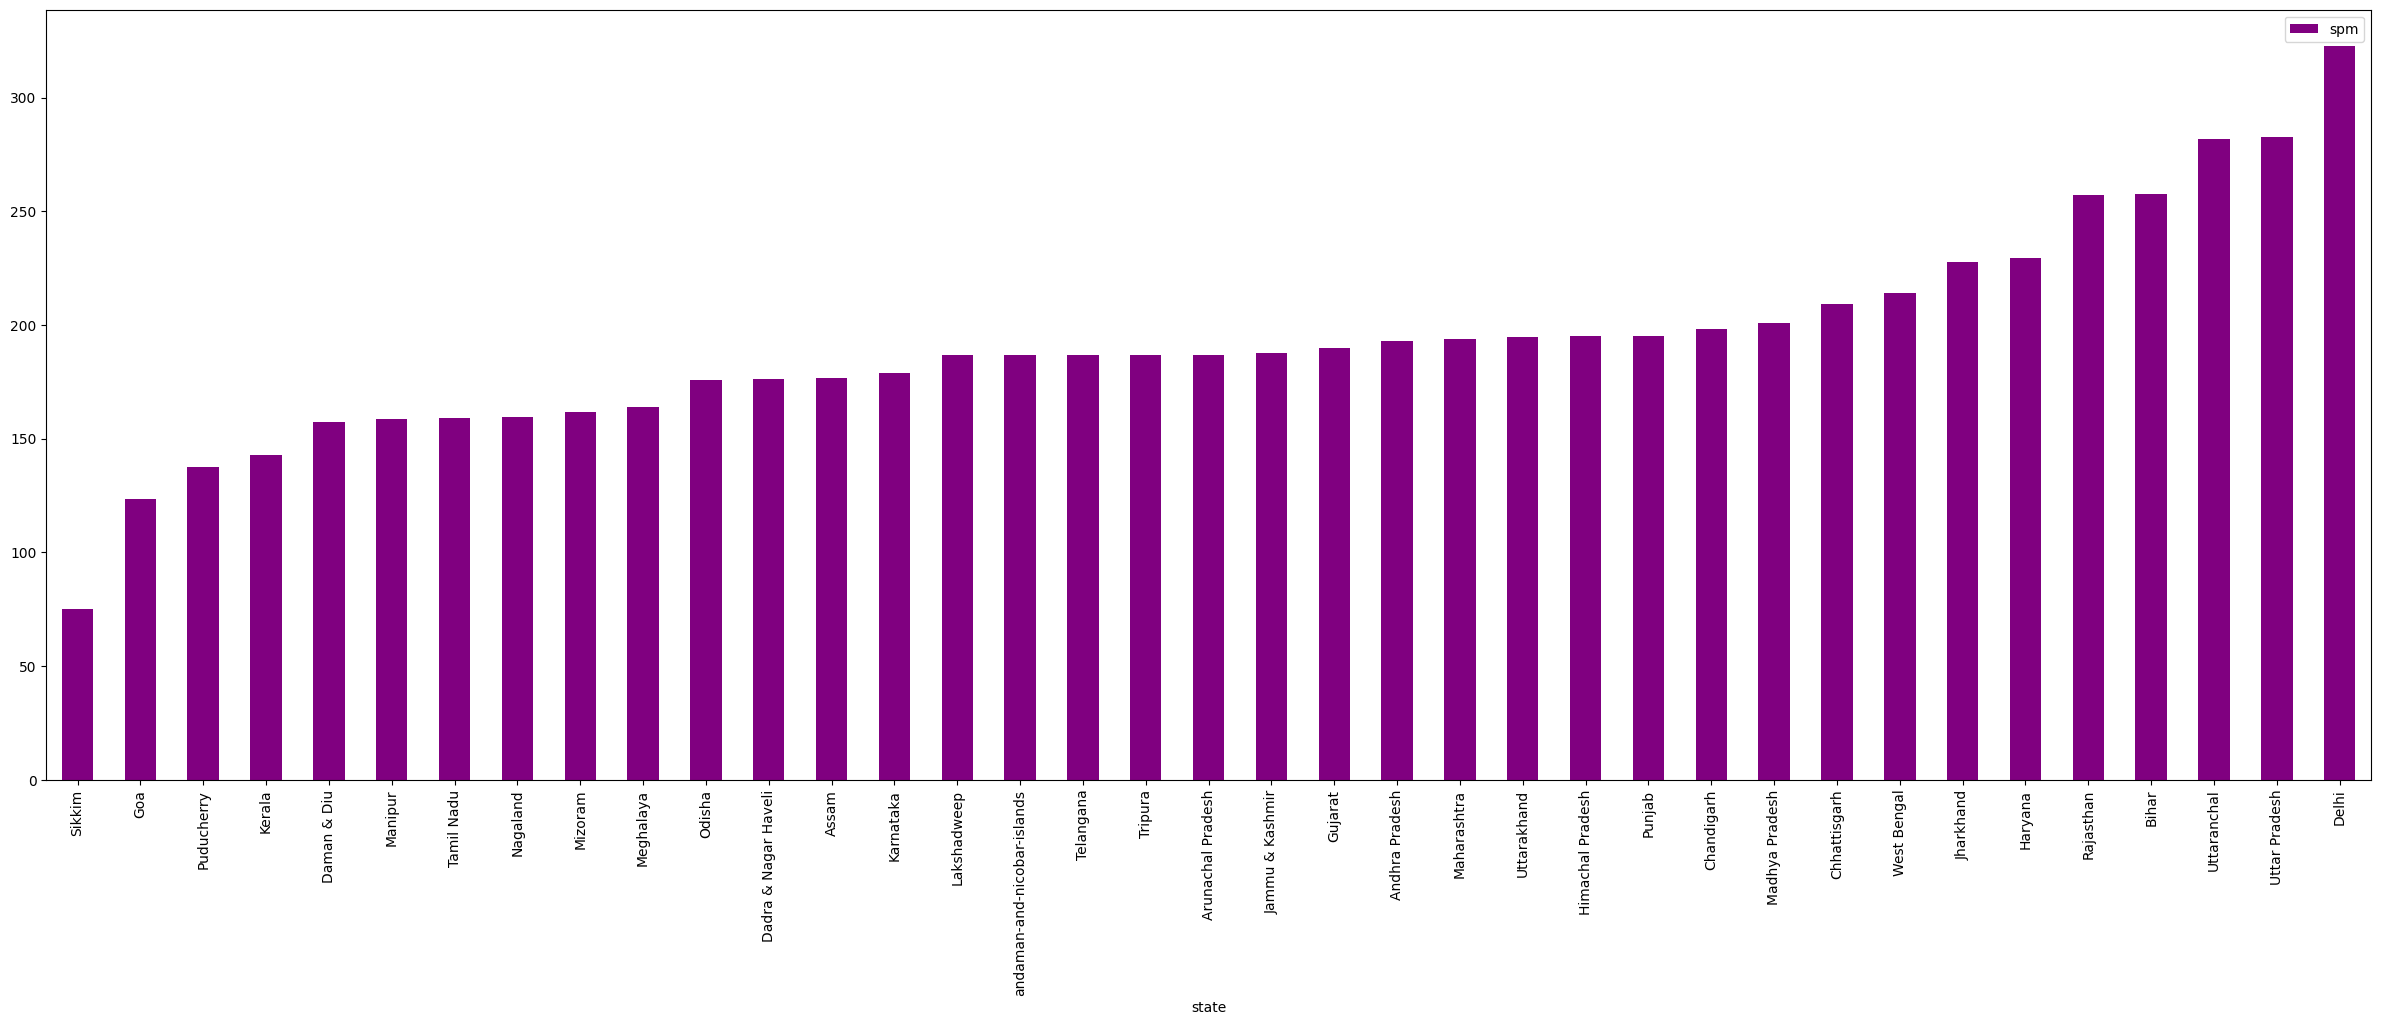

In [41]:
# use groupby to sort it in ascending order
plt.rcParams['figure.figsize']=(30,10)
df[['spm','state']].groupby(["state"]).mean().sort_values(by='spm').plot.bar(color='purple')
plt.show()

<Axes: xlabel='state', ylabel='pm2_5'>

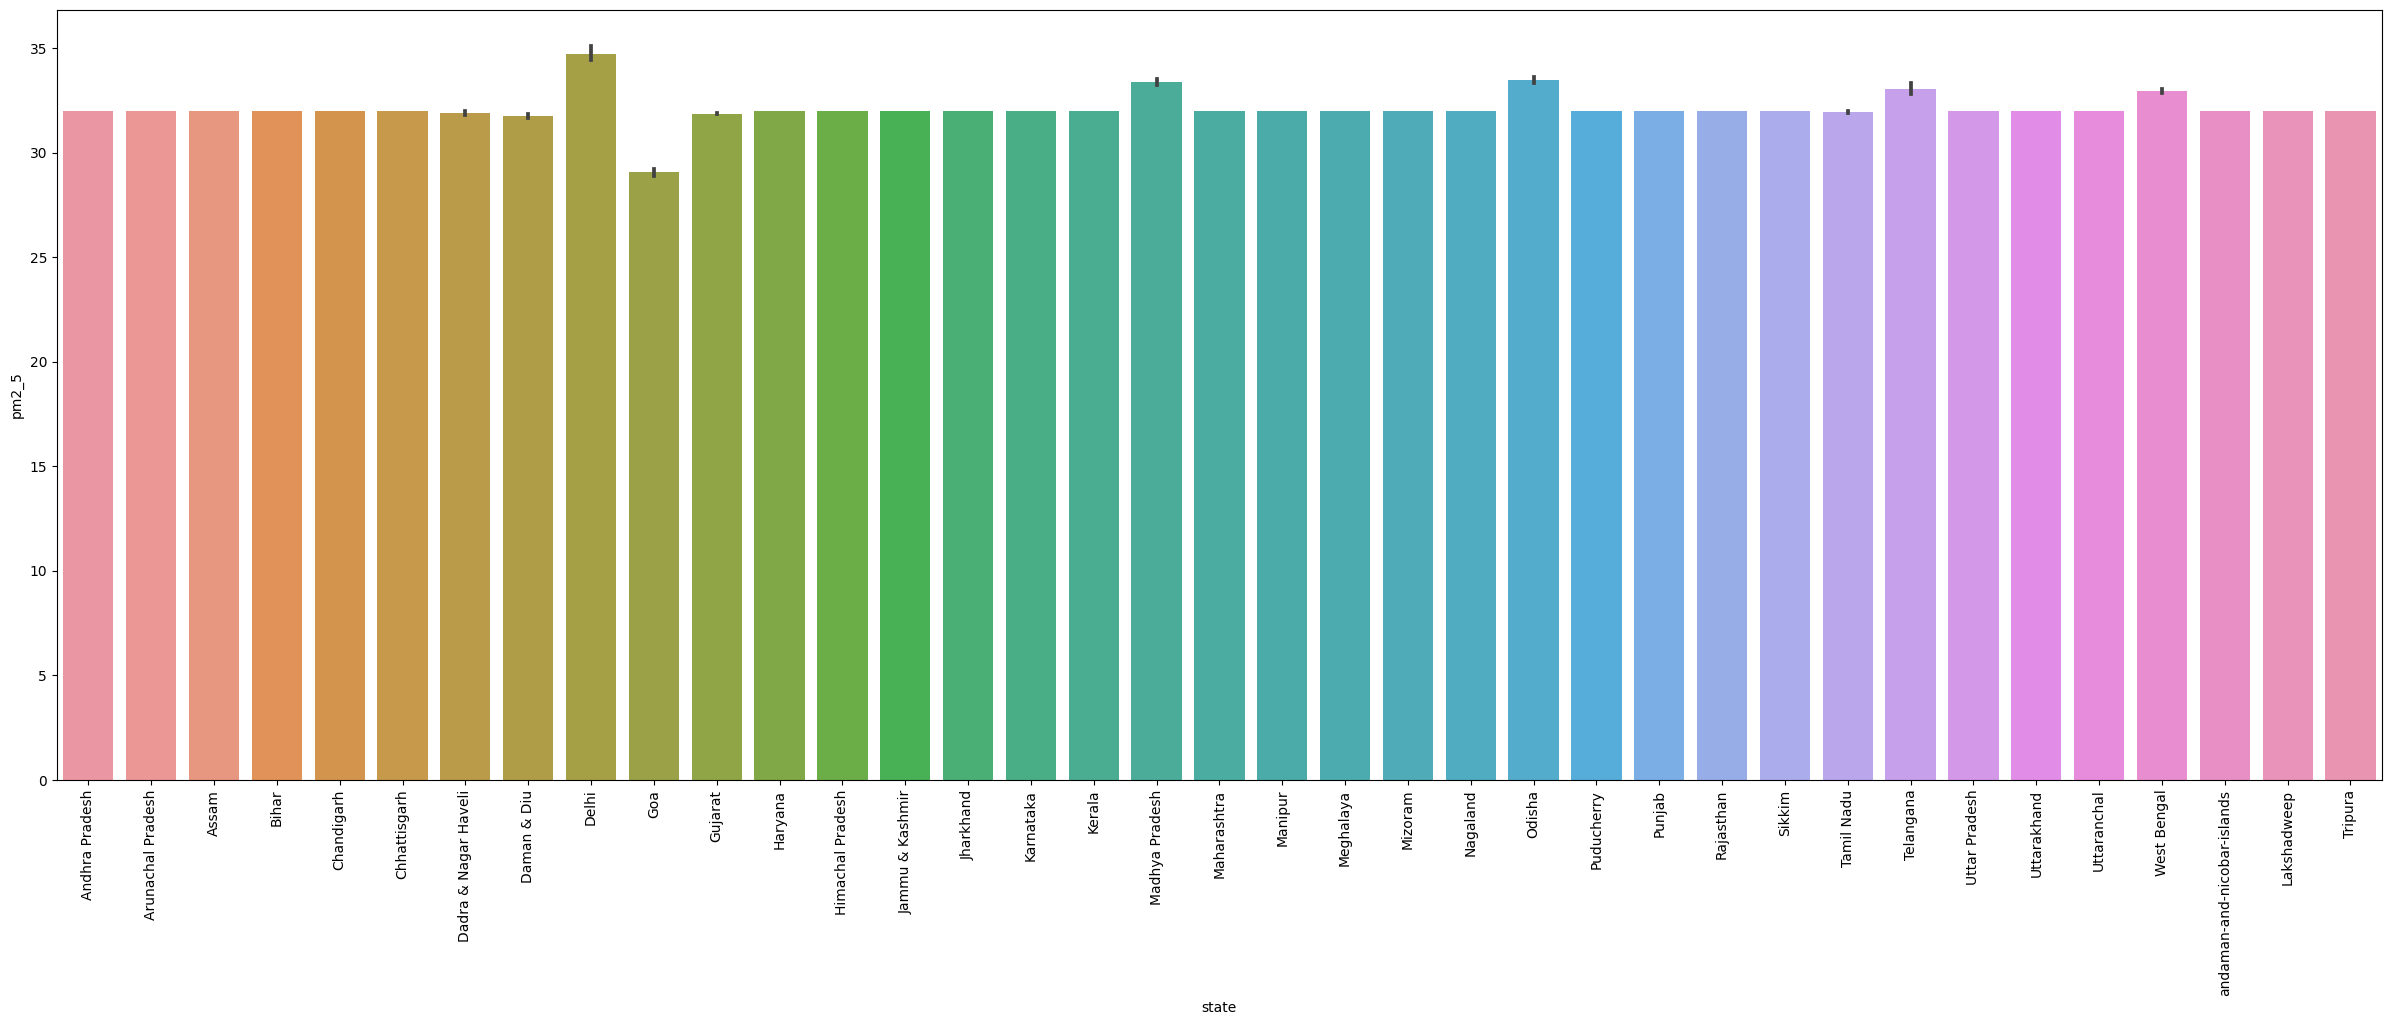

In [25]:
# check the place which has higher pm2_5 levels in the air
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state', y='pm2_5', data=df)

# West bengal has a higher no2 level compared to other states in India

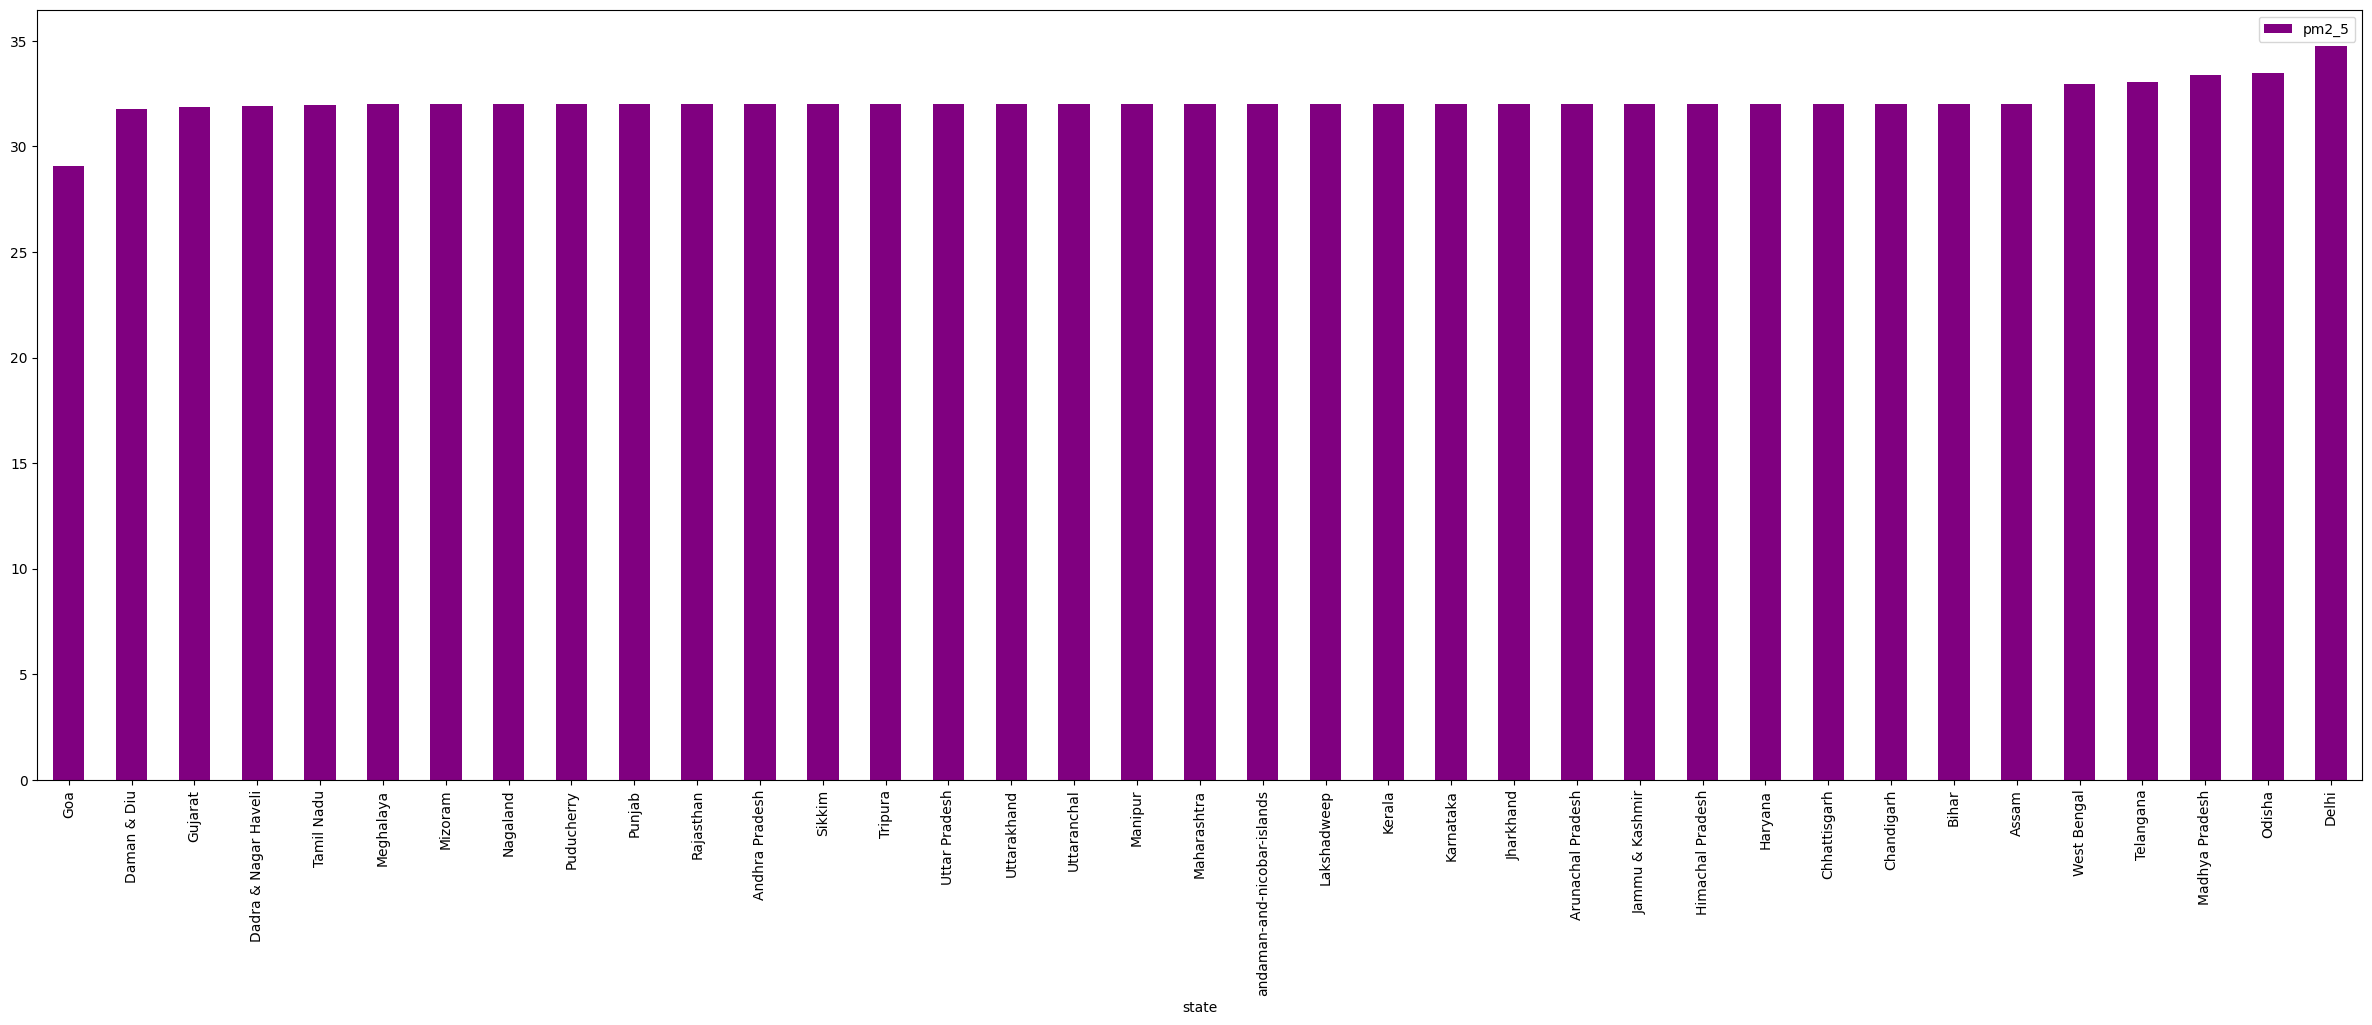

In [42]:
# use groupby to sort it in ascending order
plt.rcParams['figure.figsize']=(30,10)
df[['pm2_5','state']].groupby(["state"]).mean().sort_values(by='pm2_5').plot.bar(color='purple')
plt.show()

<Axes: >

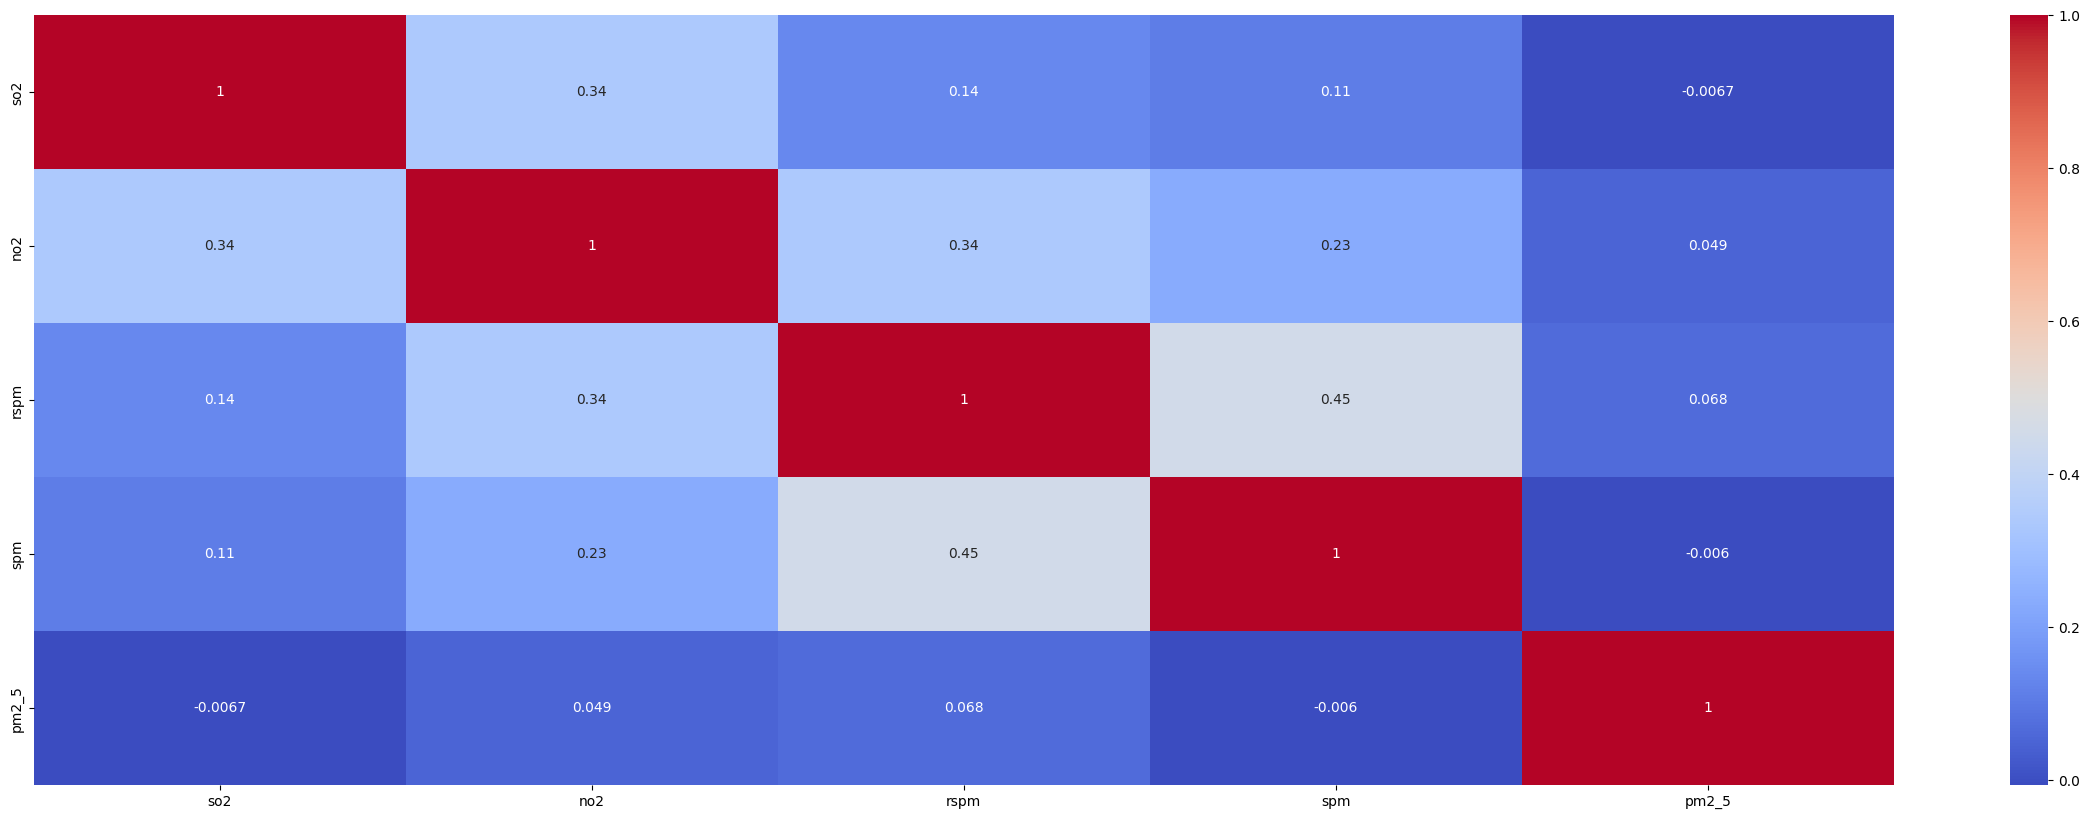

In [26]:
# Correlation Analysis using heatmaps

# create a heatmap to visualize the correlation between the features
# of the dataset

# dataframe is df and the numrerical columns are in float64_cols

sns.heatmap(df[float64_cols].corr(), annot=True, cmap='coolwarm')

# end of EDA


In [27]:
# calculate the so2 individual index (si)
def cal_si(so2):
    si = 0
    if (so2 <= 40):
        si = so2 * 50 / 40
    elif (so2 <= 80):
        si = 50 + (so2 - 40) * 50 / 40
    elif (so2 <= 380):
        si = 100 + (so2 - 80) * 100 / 300
    elif (so2 <= 800):
        si = 200 + (so2 - 380) * 100 / 420
    elif (so2 <= 1600):
        si = 300 + (so2 - 800) * 100 / 800
    else:
        si = 400 + (so2 - 1600) * 100 / 800
    return si

# apply the function to calculate si
df['si'] = df['so2'].apply(cal_si)

In [28]:
# disaplay so2 and si column only
df['si'].describe()

count    435068.000000
mean         13.158087
std          11.920423
min           0.000000
25%           6.250000
50%          10.000000
75%          16.250000
max         313.625000
Name: si, dtype: float64

In [29]:
# calculate the no2 individual index (ni)
def cal_ni(no2):
    ni = 0
    if (no2 <= 40):
        ni = no2 * 50 / 40
    elif (no2 <= 80):
        ni = 50 + (no2 - 40) * 50 / 40
    elif (no2 <= 180):
        ni = 100 + (no2 - 80) * 100 / 100
    elif (no2 <= 280):
        ni = 200 + (no2 - 180) * 100 / 100
    elif (no2 <= 400):
        ni = 300 + (no2 - 280) * 100 / 120
    else:
        ni = 400 + (no2 - 400) * 100 / 120
    return ni

# apply the function to calculate ni
df['ni'] = df['no2'].apply(cal_ni)

In [30]:
df['ni'].describe()

count    435068.000000
mean         31.982830
std          21.838784
min           0.000000
25%          17.500000
50%          27.500000
75%          40.000000
max         796.666667
Name: ni, dtype: float64

In [31]:
# calculate the rspm individual index (rpi)
def cal_rpi(rspm):
    rpi = 0
    if (rspm <= 30):
        rpi = rspm * 50 / 30
    elif (rspm <= 60):
        rpi = 50 + (rspm - 30) * 50 / 30
    elif (rspm <= 90):
        rpi = 100 + (rspm - 60) * 100 / 30
    elif (rspm <= 120):
        rpi = 200 + (rspm - 90) * 100 / 30
    elif (rspm <= 250):
        rpi = 300 + (rspm - 120) * 100 / 130
    else:
        rpi = 400 + (rspm - 250) * 100 / 130
    return rpi

# apply the function to calculate rpi
df['rpi'] = df['rspm'].apply(cal_rpi)

In [32]:
# calculate the spm individual index (spi)
def cal_spi(spm):
    spi = 0
    if (spm <= 50):
        spi = spm
    elif (spm <= 100):
        spi = spm
    elif (spm <= 250):
        spi = 100 + (spm - 100) * 100 / 150
    elif (spm <= 350):
        spi = 200 + (spm - 250)
    elif (spm <= 450):
        spi = 300 + (spm - 350) * 100 / 100
    else:
        spi = 400 + (spm - 450) * 100 / 100
    return spi

# apply the function to calculate spi
df['spi'] = df['spm'].apply(cal_spi)

In [33]:
# calculate the aqi index
def cal_aqi(si, ni, rpi, spi):
    aqi = 0
    if (si > ni and si > rpi and si > spi):
        aqi = si
    elif (ni > si and ni > rpi and ni > spi):
        aqi = ni
    elif (rpi > si and rpi > ni and rpi > spi):
        aqi = rpi
    else:
        aqi = spi
    return aqi

# apply the function to calculate aqi
df['AQI'] = df.apply(lambda x: cal_aqi(x['si'], x['ni'], x['rpi'], x['spi']), axis=1)


In [34]:
# find all the unique states in df

df['state'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'Uttaranchal', 'West Bengal',
       'andaman-and-nicobar-islands', 'Lakshadweep', 'Tripura'],
      dtype=object)

In [35]:
# locate the rows where state is West Bengal
df.loc[df['state'] == 'West Bengal'].location.unique()

array(['Haldia', 'Howrah', 'Calcutta', 'Durgapur', 'Asansol', 'Kolkata',
       'Durgapur (WB)', 'Baruipur', 'Barrackpore', 'Raniganj', 'Sankrail',
       'South Suburban', 'DANKUNI', 'HALDIA', 'Kalyani', 'MALDAH',
       'SILIGURI', 'ULUBERIA'], dtype=object)

# Machine Learning
## use ML to prdict AQI of a city

In [36]:
# locate the rows where location is Kolkata
df.loc[df['location'] == 'Kolkata']

,state,location,type,so2,no2,rspm,spm,pm2_5,si,ni,rpi,spi,AQI
415266,West Bengal,Kolkata,Industrial Area,22.2,104.8,476.0,255.0,32.0,27.750,124.80,573.846154,205.000000,573.846154
415267,West Bengal,Kolkata,Industrial Area,22.7,125.5,532.0,268.0,32.0,28.375,145.50,616.923077,218.000000,616.923077
415268,West Bengal,Kolkata,Industrial Area,22.5,118.8,446.0,224.0,32.0,28.125,138.80,550.769231,182.666667,550.769231
415269,West Bengal,Kolkata,Industrial Area,30.2,120.0,502.0,248.0,32.0,37.750,140.00,593.846154,198.666667,593.846154
415270,West Bengal,Kolkata,Industrial Area,19.2,115.2,499.0,242.0,32.0,24.000,135.20,591.538462,194.666667,591.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435422,West Bengal,Kolkata,RIRUO,4.0,61.0,171.0,187.0,98.0,5.000,76.25,339.230769,158.000000,339.230769
435423,West Bengal,Kolkata,RIRUO,6.0,63.0,217.0,187.0,105.0,7.500,78.75,374.615385,158.000000,374.615385
435424,West Bengal,Kolkata,RIRUO,7.0,69.0,264.0,187.0,121.0,8.750,86.25,410.769231,158.000000,410.769231
435425,West Bengal,Kolkata,RIRUO,5.0,58.0,191.0,187.0,89.0,6.250,72.50,354.615385,158.000000,354.615385


In [44]:
# first we need to create a dataframe with the data of Kolkata and we need to create test and train dataframes. Use lazypredict to find the best model for this dataset and use that model to predict the aqi for Kolkata

# create a dataframe with the data of Kolkata
df_kolkata = df.loc[df['location'] == 'Kolkata']

# drop the object columns
df_kolkata.drop(columns=['state', 'location', 'type'], inplace=True)

# check the shape of the dataframe
print(df_kolkata.shape)

(7733, 10)


In [45]:
# craete test and train dataframes
# import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# create the test and train dataframes
train, test = train_test_split(df_kolkata, test_size=0.2, random_state=42)

# check the shape of the train and test dataframes
print(train.shape)
print(test.shape)

(6186, 10)
(1547, 10)


In [37]:
# predict the aqi for the location Kolkata


# use lazypredict to find the best model for this dataset
# import LazyRegressor

from lazypredict.Supervised import LazyRegressor

# create the model
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

# fit the model
models, predictions = reg.fit(train.drop(columns=['AQI']), test.drop(columns=['AQI']), train['AQI'], test['AQI'])

# print the models
print(models)

/tmp/ipykernel_38277/1825764445.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kolkata.drop(columns=['state', 'location', 'type'], inplace=True)


(7733, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 7733 entries, 415266 to 435426
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   so2     7733 non-null   float64
 1   no2     7733 non-null   float64
 2   rspm    7733 non-null   float64
 3   spm     7733 non-null   float64
 4   pm2_5   7733 non-null   float64
 5   si      7733 non-null   float64
 6   ni      7733 non-null   float64
 7   rpi     7733 non-null   float64
 8   spi     7733 non-null   float64
 9   AQI     7733 non-null   float64
dtypes: float64(10)
memory usage: 664.6 KB
(6186, 10)
(1547, 10)


 74%|███████▍  | 31/42 [00:25<00:09,  1.12it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


 98%|█████████▊| 41/42 [00:31<00:00,  1.49it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012764 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2105
[LightGBM] [Info] Number of data points in the train set: 6186, number of used features: 9
[LightGBM] [Info] Start training from score 240.109482


100%|██████████| 42/42 [00:31<00:00,  1.32it/s]

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
ExtraTreeRegressor                           1.00       1.00   2.48   
XGBRegressor                                 1.00       1.00   4.44   
GradientBoostingRegressor                    1.00       1.00   5.51   
ExtraTreesRegressor                          1.00       1.00   5.67   
RandomForestRegressor                        1.00       1.00   7.94   
LGBMRegressor                                1.00       1.00   8.20   
DecisionTreeRegressor                        1.00       1.00   8.66   
HistGradientBoostingRegressor                1.00       1.00   8.66   
BaggingRegressor                             0.99       0.99   8.87   
MLPRegressor                                 0.99       0.99   9.37   
KNeighborsRegressor                          0.99       0.99   9.49   
Ridge                                        0.96       0.96  24.33   
SGDReg

In [47]:
# use LinearRegression to predict the aqi for Kolkata
# import LinearRegression from sklearn\
from sklearn.linear_model import LinearRegression

# create the model
model = LinearRegression()

# fit the model
model.fit(train.drop(columns=['AQI']), train['AQI'])

# predict the aqi for test data
pred = model.predict(test.drop(columns=['AQI']))

# check the accuracy of the model
from sklearn.metrics import r2_score

print(r2_score(test['AQI'], pred)*100 , '%')

96.12736161095054 %


In [39]:
# implement a gradio interface to take user input and predict the aqi
# the boxes to take user input for these variables - so2, no2, rspm, spm, pm2_5, si, ni, rpi, spi, aqi

# import gradio
import gradio as gr

# create a function to predict the aqi
def predict_aqi(so2, no2, rspm, spm, pm2_5, si, ni, rpi, spi, aqi):
    # create a dataframe with the user input
    user_input = pd.DataFrame({'so2': [so2], 'no2': [no2], 'rspm': [rspm], 'spm': [spm], 'pm2_5': [pm2_5], 'si': [si], 'ni': [ni], 'rpi': [rpi], 'spi': [spi], 'AQI': [aqi]})
    # predict the aqi for the user input
    pred = model.predict(user_input.drop(columns=['AQI']))
    # return the predicted aqi
    return pred[0]

# create the interface
iface = gr.Interface(fn=predict_aqi, inputs=['number', 'number', 'number', 'number', 'number', 'number', 'number', 'number', 'number', 'number'], outputs='number')

# launch the interface
iface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app. 

Also please ensure that your antivirus or firewall is not blocking the binary file located at: /home/panchajanya/.local/lib/python3.11/site-packages/gradio/frpc_linux_amd64_v0.2
